### Ссылка на презентацию - https://docs.google.com/presentation/d/1D8diUEeYb1kY7mE9PCOyQYXqRaT6zvpl-t77hSdZN-o/edit?usp=sharing

### Проект по мастерской _Заказчик Chargex - Удобный сервис зарядки гаджетов. 

Задачи проекта:

- Необходимо подготовить данные, проверить их на непротиворечивость и исключить аномалии,
- категоризировать заведения, в которых стоят точки для аренды пауер-банка,
- посмотреть, в каких из них терминалы для пауер-банков быстрее окупаются. 


In [1]:
import pandas as pd 
import math
import numpy as np  
import warnings
warnings.filterwarnings('ignore')

In [2]:
users = pd.read_csv('users.csv') # Прочитаем файлы формата csv для исследования
users.head()

,_class,_id,blocking,createdDate,roles,telegramChatId,telegramLoginState,webUser
0,com.zaryad.zaryad.backend.common.model.User,5ec3a385ab9b811e07d3e33c,False,2020-05-19T09:14:45.939Z,"[{""role"":""USER""}]",False,False,True
1,com.zaryad.zaryad.backend.common.model.User,5ec3bd6eab9b811e07d3e341,False,2020-05-19T11:05:18.231Z,"[{""role"":""USER""}]",True,True,True
2,com.zaryad.zaryad.backend.common.model.User,5ec51a6fab9b8123161f6272,False,2020-05-20T11:54:23.909Z,"[{""role"":""USER""}]",True,True,True
3,com.zaryad.zaryad.backend.common.model.User,5ec617b9ab9b8123161f6281,False,2020-05-21T05:55:05.677Z,"[{""role"":""USER""}]",True,False,True
4,com.zaryad.zaryad.backend.common.model.User,5ecd1f58ab9b8123161f62a5,False,NaN,"[{""role"":""ADMIN""}]",False,False,False


In [3]:
tariffs = pd.read_csv('tariffs.csv') 
tariffs.head()

,_class,_id,nameGroupTariffs,period,price,tariffName,timeForWork,typeTime,workingTimeInterval
0,com.zaryad.zaryad.backend.common.model.tariff....,5e724024ab9b8128a623c98e,Рублевые,1,0.0,Промо,1,HOUR,1
1,com.zaryad.zaryad.backend.common.model.tariff....,5e7243bcab9b8128a623c990,Рублевые Россия,1,0.0,Промо,1,HOUR,1
2,com.zaryad.zaryad.backend.common.model.tariff....,5e7243e4ab9b8128a623c991,Рублевые Россия,2,50.0,Час 50 рублей,2,HOUR,2
3,com.zaryad.zaryad.backend.common.model.tariff....,5e724401ab9b8128a623c992,Рублевые Россия,3,100.0,Сутки 100 рублей,30,DAY,30
4,com.zaryad.zaryad.backend.common.model.tariff....,5eccca86ab9b8123161f6296,ARMENIA,1,0.0,PROMO,1,HOUR,1


In [4]:
transactions = pd.read_csv('Downloads/chargeX_3/transactions.csv') 
transactions.head()

,_id,createdDate,description,price,rentId,transactionStatus,user._id,user.blocking,user.createdDate,user.roles,user.telegramLoginState,user.webUser
0,5ece363cab9b814d8716a6f1,2020-05-27T09:43:24.327Z,tariff period: 1,0.0,5ece363cab9b814d8716a6f0,CREDIT,5ece331eab9b814d8716a6ea,False,2020-05-27T09:30:06.148Z,"[{""role"":""USER""}]",False,True
1,5ece45a9ab9b814d8716a704,2020-05-27T10:49:13.373Z,tariff period: 2,50.0,5ece45a5ab9b814d8716a703,CREDIT,5ece331eab9b814d8716a6ea,False,2020-05-27T09:30:06.148Z,"[{""role"":""USER""}]",False,True
2,5ece45a9ab9b814d8716a705,2020-05-27T10:49:13.374Z,tariff period: 2 credit card: 1377,50.0,5ece45a5ab9b814d8716a703,DEBIT,5ece331eab9b814d8716a6ea,False,2020-05-27T09:30:06.148Z,"[{""role"":""USER""}]",False,True
3,5ecfd910ab9b815292b21713,2020-05-28T15:30:24.921Z,tariff period: 1,0.0,5ecfd910ab9b815292b21712,CREDIT,5ece331eab9b814d8716a6ea,False,2020-05-27T09:30:06.148Z,"[{""role"":""USER""}]",False,True
4,5ed7b00bab9b811856f6cab4,2020-06-03T14:13:31.525Z,tariff period: 1,0.0,5ed7b00bab9b811856f6cab3,CREDIT,5ece331eab9b814d8716a6ea,False,2020-05-27T09:30:06.148Z,"[{""role"":""USER""}]",False,True


In [5]:
stations = pd.read_csv('Downloads/chargeX_3/stations.csv') 
stations.head()

,_class,_id,additionalAddress,additionalImagesCount,address,blockedSlots,comment,connectedAddress,connectionMode,created,...,statusAt,timezone,voiceLevel,workTime.friday,workTime.monday,workTime.saturday,workTime.sunday,workTime.thursday,workTime.tuesday,workTime.wednesday
0,com.zaryad.zaryad.backend.common.model.station...,5f21c99bab9b8138c47a00f1,Mandarin Fly кофейня,0,"Кабардино-Балкарская Республика, Нальчик, Каба...",[],NaN,10.128.0.29,LTE,2021-12-03T18:51:22.474Z,...,2022-11-15T11:53:24.805Z,GMT+04:00,0,NaN,"[""ANYTIME""]",NaN,NaN,NaN,NaN,NaN
1,com.zaryad.zaryad.backend.common.model.station...,5f2711c2ab9b8102966c249c,Гости,0,"Ростов-на-Дону, Комарова 30/1",NaN,NaN,10.128.0.29,NaN,2021-12-03T18:50:20.374Z,...,2021-10-02T06:39:10.835Z,GMT+04:00,0,NaN,"[""ANYTIME""]",NaN,NaN,NaN,NaN,NaN
2,com.zaryad.zaryad.backend.common.model.station...,5f29853cab9b8102966c26c6,Кафе Мангальная,3,"Белгород, ул. Есенина, 9, корп. 4.",[],"+79511388133 Евгений, администратор",10.128.0.29,LTE,2022-02-13T18:28:31.265Z,...,2022-11-15T11:53:16.262Z,GMT+03:00,0,"[""10:00"",""00:00""]","[""10:00"",""00:00""]","[""10:00"",""00:00""]","[""10:00"",""00:00""]","[""10:00"",""00:00""]","[""10:00"",""00:00""]","[""10:00"",""00:00""]"
3,com.zaryad.zaryad.backend.common.model.station...,5f2985d0ab9b8102966c26c7,Zамания игровое кафе,0,"Москва, Ходынский бульвар, 4",[],NaN,10.128.0.29,LTE,2022-03-07T16:30:55.077Z,...,2022-11-15T11:53:26.518Z,GMT+04:00,0,NaN,"[""ANYTIME""]",NaN,NaN,NaN,NaN,NaN
4,com.zaryad.zaryad.backend.common.model.station...,5f298701ab9b8102966c26ce,Zамания игровое кафе,0,"Москва, Рублёвское шоссе, д 68А стр 5",[],NaN,10.128.0.29,LTE,2022-03-07T16:30:36.135Z,...,2022-11-15T11:53:20.242Z,GMT+04:00,0,NaN,"[""ANYTIME""]",NaN,NaN,NaN,NaN,NaN


In [6]:
rents = pd.read_csv('Downloads/chargeX_3/rents.csv')
rents.head()

,_id,completionStation,creditCardId,currentTariff.nameGroupTariffs,currentTariff.period,currentTariff.price,currentTariff.tariffName,currentTariff.timeForWork,currentTariff.typeTime,currentTariff.workingTimeInterval,...,totalAmount,transaction,updatedDate,user._id,user.blocking,user.createdDate,user.roles,user.telegramChatId,user.telegramLoginState,user.webUser
0,5ece363cab9b814d8716a6f0,"Нальчик, ул.Льва Толстого 18",5ece35c3ab9b814d8716a6ef,NaN,1,0.0,Промо,1,HOUR,0,...,0.0,['5ece363cab9b814d8716a6f1'],2020-05-27T09:43:24.329Z,5ece331eab9b814d8716a6ea,False,2020-05-27T09:30:06.148Z,"[{""role"":""USER""}]",NaN,False,True
1,5ece45a5ab9b814d8716a703,"Нальчик, ул.Льва Толстого 18",5ece35c3ab9b814d8716a6ef,NaN,2,50.0,Час 50 рублей,2,HOUR,1,...,50.0,"['5ece45a9ab9b814d8716a705', '5ece45a9ab9b814d...",2020-05-27T10:49:13.375Z,5ece331eab9b814d8716a6ea,False,2020-05-27T09:30:06.148Z,"[{""role"":""USER""}]",NaN,False,True
2,5ecfd910ab9b815292b21712,"Нальчик, ул.Льва Толстого 18",5ece35c3ab9b814d8716a6ef,NaN,1,0.0,Промо,1,HOUR,0,...,0.0,['5ecfd910ab9b815292b21713'],2020-05-28T15:30:24.921Z,5ece331eab9b814d8716a6ea,False,2020-05-27T09:30:06.148Z,"[{""role"":""USER""}]",NaN,False,True
3,5ed7b00bab9b811856f6cab3,"Нальчик, ул.Льва Толстого 18",5ece35c3ab9b814d8716a6ef,NaN,1,0.0,Промо,1,HOUR,0,...,0.0,['5ed7b00bab9b811856f6cab4'],2020-06-03T14:13:31.534Z,5ece331eab9b814d8716a6ea,False,2020-05-27T09:30:06.148Z,"[{""role"":""USER""}]",NaN,False,True
4,5ee7ab76ab9b81710d8ab8db,"Нальчик, ул.Льва Толстого 18",5ee7ab6cab9b81710d8ab8da,NaN,1,0.0,Промо,1,HOUR,0,...,0.0,['5ee7ab76ab9b81710d8ab8dc'],2020-06-15T17:10:14.076Z,5ece331eab9b814d8716a6ea,False,2020-05-27T09:30:06.148Z,"[{""role"":""USER""}]",NaN,False,True


In [7]:
rents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219583 entries, 0 to 219582
Data columns (total 37 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   _id                                219583 non-null  object 
 1   completionStation                  219254 non-null  object 
 2   creditCardId                       219046 non-null  object 
 3   currentTariff.nameGroupTariffs     78669 non-null   object 
 4   currentTariff.period               219583 non-null  int64  
 5   currentTariff.price                219583 non-null  float64
 6   currentTariff.tariffName           219583 non-null  object 
 7   currentTariff.timeForWork          219583 non-null  int64  
 8   currentTariff.typeTime             219583 non-null  object 
 9   currentTariff.workingTimeInterval  219583 non-null  int64  
 10  debt                               219583 non-null  float64
 11  finishedDate                       2192

In [8]:
promo = pd.read_csv('Downloads/chargeX_3/promo.csv')
promo.head()

,_class,_id,createdDate,groupTariffs,promo,specialTariff,user._id,user.blocking,user.createdDate,user.roles,user.telegramLoginState,user.webUser
0,com.zaryad.zaryad.backend.common.model.tariff....,5f495af024aa9a00064e5688,2020-08-28T19:28:48.818Z,NaN,False,NaN,5ec3a385ab9b811e07d3e33c,False,2020-05-19T09:14:45.939Z,"[{""role"":""USER""}]",False,True
1,com.zaryad.zaryad.backend.common.model.tariff....,5f495af024aa9a00064e5689,2020-08-28T19:28:48.845Z,[object Object],False,True,5ec3bd6eab9b811e07d3e341,False,2020-05-19T11:05:18.231Z,"[{""role"":""USER""}]",True,True
2,com.zaryad.zaryad.backend.common.model.tariff....,5f495af024aa9a00064e568a,2020-08-28T19:28:48.846Z,[object Object],False,True,5ec51a6fab9b8123161f6272,False,2020-05-20T11:54:23.909Z,"[{""role"":""USER""}]",False,True
3,com.zaryad.zaryad.backend.common.model.tariff....,5f495af024aa9a00064e568b,2020-08-28T19:28:48.847Z,NaN,False,NaN,5ec617b9ab9b8123161f6281,False,2020-05-21T05:55:05.677Z,"[{""role"":""USER""}]",False,True
4,com.zaryad.zaryad.backend.common.model.tariff....,5f495af024aa9a00064e568c,2020-08-28T19:28:48.848Z,NaN,False,NaN,5ece32d7ab9b814d8716a6e8,False,2020-05-27T09:28:55.905Z,"[{""role"":""USER""}]",False,True


In [9]:
power_banks = pd.read_csv('Downloads/chargeX_3/power_banks.csv')
power_banks.head()

,_class,_id,atUser,batteryLevel,batteryLevelPercent,blocked,created,lastStation,owner,powerBankId,slot,status,statusAt
0,com.zaryad.zaryad.backend.common.model.station...,5f2ea70ebe0777000773cd5b,NaN,PERCENT_UNKNOWN,-1,NaN,2020-08-08T13:22:22.512Z,[object Object],NaN,6143549019743347460,5,RENTED,2020-10-27T11:25:30.908Z
1,com.zaryad.zaryad.backend.common.model.station...,5f2ea70ebe0777000773cd5c,admin,PERCENT_UNKNOWN,-1,False,2020-08-08T13:22:22.535Z,[object Object],60a670d760f61b6f012586d3,5930171193772474470,4,RENTED,2022-11-09T17:38:07.582Z
2,com.zaryad.zaryad.backend.common.model.station...,5f2ea70ebe0777000773cd5d,NaN,PERCENT_81_100,100,NaN,2020-08-08T13:22:22.537Z,[object Object],NaN,5930171193772475241,6,LOST,2022-01-27T14:36:49.980Z
3,com.zaryad.zaryad.backend.common.model.station...,5f2ea70ebe0777000773cd5e,NaN,PERCENT_81_100,100,NaN,2020-08-08T13:22:22.538Z,[object Object],NaN,5930171193772475185,5,LOST,2022-01-27T14:36:49.981Z
4,com.zaryad.zaryad.backend.common.model.station...,5f2ea70ebe0777000773cd5f,NaN,PERCENT_UNKNOWN,-1,NaN,2020-08-08T13:22:22.539Z,[object Object],NaN,6143549019743336817,17,RENTED,2020-10-29T16:27:51.190Z


In [10]:
group_tariffs = pd.read_csv('Downloads/chargeX_3/group_tariffs.csv')
group_tariffs.head()

,_class,_id,groupName,location,periodCount,tariffType,tariffs
0,com.zaryad.zaryad.backend.common.model.tariff....,5f71cf662ab79c0006b29602,Рублёвый. Суточный,RU,1,NaN,"[{""tariffName"":""Рублёвый. Суточный-Суточный"",""..."
1,com.zaryad.zaryad.backend.common.model.tariff....,5f71d0342ab79c0006b29604,Рублёвый. Час и сутки,RU,2,NaN,"[{""tariffName"":""Час и сутки - 50₽/час"",""workin..."
2,com.zaryad.zaryad.backend.common.model.tariff....,5f71d09e2ab79c0006b29607,Рублёвый. Час и сутки с бесплатным периодом.,RU,3,NaN,"[{""tariffName"":""Рублёвый. Час и сутки с бес. -..."
3,com.zaryad.zaryad.backend.common.model.tariff....,5f71d1452ab79c0006b2960b,Рублёвый. Сутки с бесплатным тарифом.,RU,2,NaN,"[{""tariffName"":""Рублёвый. Сутки с бес. - 30 ми..."
4,com.zaryad.zaryad.backend.common.model.tariff....,5f71e2202ab79c0006b2961b,Рублевый. Час и сутки с бесплатным периодом 60...,RU,3,NaN,"[{""tariffName"":""бесплатным периодом 60 минут.""..."


Теперь прочитаем файлы формата json и раскроем отдельный столбцы в таблице, которые сразу не прочитаны.

In [11]:
referral_rents= pd.read_json('Downloads/chargeX_3/referral_rents.json')
referral_rents.head()

,_id,station,waiterRent,userRent,waiter,cratedAt,notificationStatus,rentStatus,_class,amount,paymentStatus
0,{'$oid': '626bcad24ab1015d4b75f3ff'},"{'$ref': 'station', '$id': {'$oid': '5fbe9edd9...","{'$ref': 'rent', '$id': {'$oid': '626bcace4ab1...","{'$ref': 'rent', '$id': {'$oid': '626bcba64ab1...","{'$ref': 'waiter_info', '$id': {'$oid': '626bc...",{'$date': {'$numberLong': '1651231442802'}},NOTIFICATION_SENT,FINISHED,com.zaryad.zaryad.backend.common.model.referra...,NaN,NaN
1,{'$oid': '626bcccf4ab1015d4b75f474'},"{'$ref': 'station', '$id': {'$oid': '5fbe9edd9...","{'$ref': 'rent', '$id': {'$oid': '626bcccb4ab1...","{'$ref': 'rent', '$id': {'$oid': '626bd22a4ab1...","{'$ref': 'waiter_info', '$id': {'$oid': '626bc...",{'$date': {'$numberLong': '1651231951490'}},NOTIFICATION_SENT,FINISHED,com.zaryad.zaryad.backend.common.model.referra...,NaN,NaN
2,{'$oid': '626bf8564ab1015d4b75fa09'},"{'$ref': 'station', '$id': {'$oid': '61f96d3b5...","{'$ref': 'rent', '$id': {'$oid': '626bf8524ab1...","{'$ref': 'rent', '$id': {'$oid': '626bf8a84ab1...","{'$ref': 'waiter_info', '$id': {'$oid': '626bf...",{'$date': {'$numberLong': '1651243094835'}},NOTIFICATION_SENT,FINISHED,com.zaryad.zaryad.backend.common.model.referra...,NaN,NaN
3,{'$oid': '626cf0614ab1015d4b760bf2'},"{'$ref': 'station', '$id': {'$oid': '61f96d3b5...","{'$ref': 'rent', '$id': {'$oid': '626cf05e4ab1...","{'$ref': 'rent', '$id': {'$oid': '626cf11e4ab1...","{'$ref': 'waiter_info', '$id': {'$oid': '626ce...",{'$date': {'$numberLong': '1651306593441'}},NOTIFICATION_SENT,FINISHED,com.zaryad.zaryad.backend.common.model.referra...,NaN,NaN
4,{'$oid': '626cf1784ab1015d4b760c27'},"{'$ref': 'station', '$id': {'$oid': '61f96d3b5...","{'$ref': 'rent', '$id': {'$oid': '626cf1754ab1...","{'$ref': 'rent', '$id': {'$oid': '626cf1c64ab1...","{'$ref': 'waiter_info', '$id': {'$oid': '626ce...",{'$date': {'$numberLong': '1651306872521'}},NOTIFICATION_SENT,FINISHED,com.zaryad.zaryad.backend.common.model.referra...,NaN,NaN


In [12]:
power_banks_js=pd.read_json('Downloads/chargeX_3/power_banks.json')
power_banks_js.head()

,_id,powerBankId,created,slot,status,statusAt,batteryLevelPercent,batteryLevel,lastStation,_class,blocked,atUser,owner
0,{'$oid': '5f2ea70ebe0777000773cd5b'},6.143549e+18,{'$date': {'$numberLong': '1596892942512'}},5,RENTED,{'$date': {'$numberLong': '1603797930908'}},-1,PERCENT_UNKNOWN,"{'$ref': 'station', '$id': {'$oid': '5f8d4d34a...",com.zaryad.zaryad.backend.common.model.station...,NaN,None,None
1,{'$oid': '5f2ea70ebe0777000773cd5c'},5.930171e+18,{'$date': {'$numberLong': '1596892942535'}},4,IN_STATION,{'$date': {'$numberLong': '1670944805711'}},100,PERCENT_81_100,"{'$ref': 'station', '$id': {'$oid': '60718d418...",com.zaryad.zaryad.backend.common.model.station...,0.0,admin,60a670d760f61b6f012586d3
2,{'$oid': '5f2ea70ebe0777000773cd5d'},5.930171e+18,{'$date': {'$numberLong': '1596892942537'}},6,LOST,{'$date': {'$numberLong': '1643294209980'}},100,PERCENT_81_100,"{'$ref': 'station', '$id': {'$oid': '605ca5ced...",com.zaryad.zaryad.backend.common.model.station...,NaN,None,None
3,{'$oid': '5f2ea70ebe0777000773cd5e'},5.930171e+18,{'$date': {'$numberLong': '1596892942538'}},5,LOST,{'$date': {'$numberLong': '1643294209981'}},100,PERCENT_81_100,"{'$ref': 'station', '$id': {'$oid': '605ca5ced...",com.zaryad.zaryad.backend.common.model.station...,NaN,None,None
4,{'$oid': '5f2ea70ebe0777000773cd5f'},6.143549e+18,{'$date': {'$numberLong': '1596892942539'}},17,RENTED,{'$date': {'$numberLong': '1603988871190'}},-1,PERCENT_UNKNOWN,"{'$ref': 'station', '$id': {'$oid': '5f8d4d34a...",com.zaryad.zaryad.backend.common.model.station...,NaN,None,None


In [13]:
power_bank_problem_events=pd.read_json('Downloads/chargeX_3/power_bank_problem_events.json')

power_bank_problem_events.head()

,_id,powerBankId,slot,checkPeriod,powerBankOwner,created,lastStation,eventState,problemComment,_class,updatedAt
0,{'$oid': '62a985bf6e22f671ff5793ad'},5930171193806028800,4,10.0,6120ccd3a0ce3d3792fbca00,{'$date': {'$numberLong': '1655276991161'}},"{'$ref': 'station', '$id': {'$oid': '61430f628...",COMPLETED,Пауэрбанк не заряжает или оторван/ поврежден шнур,com.zaryad.zaryad.backend.common.model.station...,None
1,{'$oid': '62a986be6e22f671ff5793b9'},5930171193822808064,8,10.0,61a4e2d74fb21d5617c750b5,{'$date': {'$numberLong': '1655277246450'}},"{'$ref': 'station', '$id': {'$oid': '618128ec0...",COMPLETED,шнур для зарядки айфона был поврежден,com.zaryad.zaryad.backend.common.model.station...,None
2,{'$oid': '62a987766e22f671ff5793bb'},5930171193806029824,5,10.0,61a4e2d74fb21d5617c750b5,{'$date': {'$numberLong': '1655277430713'}},"{'$ref': 'station', '$id': {'$oid': '61f7fe9a5...",COMPLETED,"пауэрбанк не заряжает, несколько раз арендовал...",com.zaryad.zaryad.backend.common.model.station...,None
3,{'$oid': '62a988e96e22f671ff5793bd'},5063825300585973760,5,10.0,611cdf498bcc4a35d7edeb60,{'$date': {'$numberLong': '1655277801674'}},"{'$ref': 'station', '$id': {'$oid': '611d315c8...",COMPLETED,Пауэрбанк не заряжает или оторван/ поврежден ш...,com.zaryad.zaryad.backend.common.model.station...,None
4,{'$oid': '62a98c2e6e22f671ff5793d2'},5063825300585972736,1,10.0,5f2bdc06ab9b8102966c281c,{'$date': {'$numberLong': '1655278638807'}},"{'$ref': 'station', '$id': {'$oid': '608ff94cf...",COMPLETED,не заряжает. скорее всего шнур от айфона,com.zaryad.zaryad.backend.common.model.station...,None


In [14]:
payment_services_js=pd.read_json('Downloads/chargeX_3/payment_services.json')
payment_services_js.head()

,_id,paymentServiceName,user,_class
0,{'$oid': '5ec3a385ab9b811e07d3e33d'},AMERIA_BANK,"{'$ref': 'user', '$id': {'$oid': '5ec3a385ab9b...",com.zaryad.zaryad.backend.common.model.payment...
1,{'$oid': '5ec3bd6eab9b811e07d3e342'},YANDEX_MONEY,"{'$ref': 'user', '$id': {'$oid': '5ec3bd6eab9b...",com.zaryad.zaryad.backend.common.model.payment...
2,{'$oid': '5ec51a6fab9b8123161f6273'},BE_PAID,"{'$ref': 'user', '$id': {'$oid': '5ec51a6fab9b...",com.zaryad.zaryad.backend.common.model.payment...
3,{'$oid': '5ec617b9ab9b8123161f6282'},AMERIA_BANK,"{'$ref': 'user', '$id': {'$oid': '5ec617b9ab9b...",com.zaryad.zaryad.backend.common.model.payment...
4,{'$oid': '5ece331eab9b814d8716a6eb'},YANDEX_MONEY,"{'$ref': 'user', '$id': {'$oid': '5ece331eab9b...",com.zaryad.zaryad.backend.common.model.payment...


In [15]:
credit_cards=pd.read_json('Downloads/chargeX_3/credit_cards.json')
credit_cards.head()

,_id,first6,expiryMonth,expiryYear,cardType,user,recurringId,_default,_class
0,{'$oid': '602a2efd6019292774dcac6b'},553691,2,2029,MasterCard,"{'$ref': 'user', '$id': {'$oid': '601ab5e09613...",27bc424b-000f-5000-a000-1f65736a05e7,False,com.zaryad.zaryad.backend.common.model.payment...
1,{'$oid': '602a5c2b36bd837e57d405bc'},546918,8,2022,MasterCard,"{'$ref': 'user', '$id': {'$oid': '601c17e69613...",27bc6fa1-000f-5000-9000-11f506ed517a,True,com.zaryad.zaryad.backend.common.model.payment...
2,{'$oid': '602a753336bd837e57d405eb'},220220,6,2024,MIR,"{'$ref': 'user', '$id': {'$oid': '602a74e736bd...",27bc88ae-000f-5000-9000-101e83fe6511,False,com.zaryad.zaryad.backend.common.model.payment...
3,{'$oid': '602a782536bd837e57d405ff'},546960,10,2022,MasterCard,"{'$ref': 'user', '$id': {'$oid': '5fe22050e38b...",27bc89c9-000f-5000-9000-14a63fa55d32,False,com.zaryad.zaryad.backend.common.model.payment...
4,{'$oid': '602a7e4036bd837e57d40621'},437773,11,2024,Visa,"{'$ref': 'user', '$id': {'$oid': '5ffdd4ab76e1...",27bc9189-000f-5000-8000-15f923709815,True,com.zaryad.zaryad.backend.common.model.payment...


In [16]:
credit_cards['user'] = pd.json_normalize(credit_cards['user'])['$id.$oid']
credit_cards['_id']= pd.json_normalize(credit_cards['_id'])


In [17]:
credit_cards.head()

,_id,first6,expiryMonth,expiryYear,cardType,user,recurringId,_default,_class
0,602a2efd6019292774dcac6b,553691,2,2029,MasterCard,601ab5e09613645c721ca691,27bc424b-000f-5000-a000-1f65736a05e7,False,com.zaryad.zaryad.backend.common.model.payment...
1,602a5c2b36bd837e57d405bc,546918,8,2022,MasterCard,601c17e69613645c721caae8,27bc6fa1-000f-5000-9000-11f506ed517a,True,com.zaryad.zaryad.backend.common.model.payment...
2,602a753336bd837e57d405eb,220220,6,2024,MIR,602a74e736bd837e57d405e6,27bc88ae-000f-5000-9000-101e83fe6511,False,com.zaryad.zaryad.backend.common.model.payment...
3,602a782536bd837e57d405ff,546960,10,2022,MasterCard,5fe22050e38b4e6ed108331e,27bc89c9-000f-5000-9000-14a63fa55d32,False,com.zaryad.zaryad.backend.common.model.payment...
4,602a7e4036bd837e57d40621,437773,11,2024,Visa,5ffdd4ab76e17d25a3e53cba,27bc9189-000f-5000-8000-15f923709815,True,com.zaryad.zaryad.backend.common.model.payment...


In [18]:
power_bank_problem_events['lastStation']= pd.json_normalize(power_bank_problem_events['lastStation'])['$id.$oid']
power_bank_problem_events['_id']= pd.json_normalize(power_bank_problem_events['_id'])
power_bank_problem_events['created']= pd.json_normalize(power_bank_problem_events['created'])
power_bank_problem_events.head()

,_id,powerBankId,slot,checkPeriod,powerBankOwner,created,lastStation,eventState,problemComment,_class,updatedAt
0,62a985bf6e22f671ff5793ad,5930171193806028800,4,10.0,6120ccd3a0ce3d3792fbca00,1655276991161,61430f628a0d457de939189a,COMPLETED,Пауэрбанк не заряжает или оторван/ поврежден шнур,com.zaryad.zaryad.backend.common.model.station...,None
1,62a986be6e22f671ff5793b9,5930171193822808064,8,10.0,61a4e2d74fb21d5617c750b5,1655277246450,618128ec013c3b3154172d19,COMPLETED,шнур для зарядки айфона был поврежден,com.zaryad.zaryad.backend.common.model.station...,None
2,62a987766e22f671ff5793bb,5930171193806029824,5,10.0,61a4e2d74fb21d5617c750b5,1655277430713,61f7fe9a5b54024ca04ab61e,COMPLETED,"пауэрбанк не заряжает, несколько раз арендовал...",com.zaryad.zaryad.backend.common.model.station...,None
3,62a988e96e22f671ff5793bd,5063825300585973760,5,10.0,611cdf498bcc4a35d7edeb60,1655277801674,611d315c8bcc4a35d7edf2c5,COMPLETED,Пауэрбанк не заряжает или оторван/ поврежден ш...,com.zaryad.zaryad.backend.common.model.station...,None
4,62a98c2e6e22f671ff5793d2,5063825300585972736,1,10.0,5f2bdc06ab9b8102966c281c,1655278638807,608ff94cfc2a410470ca8647,COMPLETED,не заряжает. скорее всего шнур от айфона,com.zaryad.zaryad.backend.common.model.station...,None


In [19]:
payment_services_js['user']=pd.json_normalize(payment_services_js['user'])['$id.$oid']
payment_services_js['_id']= pd.json_normalize(payment_services_js['_id'])
payment_services_js.head()

,_id,paymentServiceName,user,_class
0,5ec3a385ab9b811e07d3e33d,AMERIA_BANK,5ec3a385ab9b811e07d3e33c,com.zaryad.zaryad.backend.common.model.payment...
1,5ec3bd6eab9b811e07d3e342,YANDEX_MONEY,5ec3bd6eab9b811e07d3e341,com.zaryad.zaryad.backend.common.model.payment...
2,5ec51a6fab9b8123161f6273,BE_PAID,5ec51a6fab9b8123161f6272,com.zaryad.zaryad.backend.common.model.payment...
3,5ec617b9ab9b8123161f6282,AMERIA_BANK,5ec617b9ab9b8123161f6281,com.zaryad.zaryad.backend.common.model.payment...
4,5ece331eab9b814d8716a6eb,YANDEX_MONEY,5ece331eab9b814d8716a6ea,com.zaryad.zaryad.backend.common.model.payment...


## Предобработка данных

Проверим таблицы на пропуски. И посмотрим,чем можно их заменить.

In [20]:
users.info()
users.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140554 entries, 0 to 140553
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   _class              140554 non-null  object
 1   _id                 140554 non-null  object
 2   blocking            140554 non-null  bool  
 3   createdDate         140500 non-null  object
 4   roles               140554 non-null  object
 5   telegramChatId      140554 non-null  bool  
 6   telegramLoginState  140554 non-null  bool  
 7   webUser             140554 non-null  bool  
dtypes: bool(4), object(4)
memory usage: 4.8+ MB


_class                 0
_id                    0
blocking               0
createdDate           54
roles                  0
telegramChatId         0
telegramLoginState     0
webUser                0
dtype: int64

Заменили пропуски в столбце createdDate  на ноль.

In [21]:
users=users.fillna('0')
users.isna().sum()

_class                0
_id                   0
blocking              0
createdDate           0
roles                 0
telegramChatId        0
telegramLoginState    0
webUser               0
dtype: int64

Проверим пропуски в таблице tariffs.

In [22]:
tariffs.isna().sum()

_class                 0
_id                    0
nameGroupTariffs       0
period                 0
price                  0
tariffName             0
timeForWork            0
typeTime               0
workingTimeInterval    0
dtype: int64

Пропусков в таблице  tariffs не содержится.Теперь проверим пропуски в остальных таблицах.

In [23]:
transactions.isna().sum()

_id                        0
createdDate                0
description                0
price                      0
rentId                     0
transactionStatus          0
user._id                   3
user.blocking              3
user.createdDate           3
user.roles                 3
user.telegramLoginState    3
user.webUser               3
dtype: int64

В таблице transactions пропусков незначительно, поэтому их можно оставить и не удалять.

In [24]:
stations.isna().sum()

_class                        0
_id                           0
additionalAddress             0
additionalImagesCount         0
address                       0
blockedSlots                 30
comment                     836
connectedAddress              2
connectionMode               63
created                       0
csq                           0
firmwareVersion               4
groupTariffs._id              0
groupTariffs.groupName        0
groupTariffs.location         0
groupTariffs.periodCount      0
groupTariffs.tariffType      68
groupTariffs.tariffs          0
latitude                      0
locked                        0
longitude                     0
numberSlots                   0
owner                       905
simCardId                     4
stationID                     0
stationNumber                 0
status                        2
statusAt                      2
timezone                      0
voiceLevel                    0
workTime.friday             519
workTime

In [25]:
rents.isna().sum()

_id                                       0
completionStation                       329
creditCardId                            537
currentTariff.nameGroupTariffs       140914
currentTariff.period                      0
currentTariff.price                       0
currentTariff.tariffName                  0
currentTariff.timeForWork                 0
currentTariff.typeTime                    0
currentTariff.workingTimeInterval         0
debt                                      0
finishedDate                            307
groupTariffs._id                          0
groupTariffs.groupName                    0
groupTariffs.location                     0
groupTariffs.periodCount                  0
groupTariffs.tariffs                      0
notificationStatus                       97
powerBankID                             668
price                                     0
rentStatus                                0
startDate                                 0
startStation                    

In [26]:
rents['rentStatus'].unique()  

array(['FINISHED', 'INIT', 'PROCESSING'], dtype=object)

In [27]:
promo.isna().sum()

_class                          0
_id                             0
createdDate                     0
groupTariffs               139975
promo                           0
specialTariff                2814
user._id                        0
user.blocking                   0
user.createdDate                0
user.roles                      0
user.telegramLoginState         0
user.webUser                    0
dtype: int64

In [28]:
power_banks.isna().sum()

_class                    0
_id                       0
atUser                 8362
batteryLevel              0
batteryLevelPercent       0
blocked                2592
created                   0
lastStation               0
owner                  2595
powerBankId               0
slot                      0
status                    0
statusAt                  0
dtype: int64

In [29]:
power_banks=power_banks.fillna('0')
promo = promo.fillna('0')
rents = rents.fillna('0')
stations = stations.fillna('0')

Для того,чтобы понять какие станции приносят выручку,нужно  объединить две таблицы stations и rents. Сначала рассмотрим  таблицу stations.

In [30]:
stations['workTime.friday'].nunique()

89

В таблице stations отбросим ненужные столбцы.

In [31]:
stations=stations[['_class','_id','additionalAddress','additionalImagesCount','address','blockedSlots','created','statusAt','stationID','numberSlots']]
stations.head()

,_class,_id,additionalAddress,additionalImagesCount,address,blockedSlots,created,statusAt,stationID,numberSlots
0,com.zaryad.zaryad.backend.common.model.station...,5f21c99bab9b8138c47a00f1,Mandarin Fly кофейня,0,"Кабардино-Балкарская Республика, Нальчик, Каба...",[],2021-12-03T18:51:22.474Z,2022-11-15T11:53:24.805Z,RL3H081907640181,8
1,com.zaryad.zaryad.backend.common.model.station...,5f2711c2ab9b8102966c249c,Гости,0,"Ростов-на-Дону, Комарова 30/1",0,2021-12-03T18:50:20.374Z,2021-10-02T06:39:10.835Z,DONB031901810097,3
2,com.zaryad.zaryad.backend.common.model.station...,5f29853cab9b8102966c26c6,Кафе Мангальная,3,"Белгород, ул. Есенина, 9, корп. 4.",[],2022-02-13T18:28:31.265Z,2022-11-15T11:53:16.262Z,FFRH082006200044,8
3,com.zaryad.zaryad.backend.common.model.station...,5f2985d0ab9b8102966c26c7,Zамания игровое кафе,0,"Москва, Ходынский бульвар, 4",[],2022-03-07T16:30:55.077Z,2022-11-15T11:53:26.518Z,FFRH082006810010,8
4,com.zaryad.zaryad.backend.common.model.station...,5f298701ab9b8102966c26ce,Zамания игровое кафе,0,"Москва, Рублёвское шоссе, д 68А стр 5",[],2022-03-07T16:30:36.135Z,2022-11-15T11:53:20.242Z,FFRH082006470029,8


In [32]:
len(stations)

905

In [33]:
len(rents)

219583

In [34]:
df_renst= rents.merge(stations,on='stationID',how='left')
df_renst.head()

,_id_x,completionStation,creditCardId,currentTariff.nameGroupTariffs,currentTariff.period,currentTariff.price,currentTariff.tariffName,currentTariff.timeForWork,currentTariff.typeTime,currentTariff.workingTimeInterval,...,user.webUser,_class,_id_y,additionalAddress,additionalImagesCount,address,blockedSlots,created,statusAt,numberSlots
0,5ece363cab9b814d8716a6f0,"Нальчик, ул.Льва Толстого 18",5ece35c3ab9b814d8716a6ef,0,1,0.0,Промо,1,HOUR,0,...,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5ece45a5ab9b814d8716a703,"Нальчик, ул.Льва Толстого 18",5ece35c3ab9b814d8716a6ef,0,2,50.0,Час 50 рублей,2,HOUR,1,...,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5ecfd910ab9b815292b21712,"Нальчик, ул.Льва Толстого 18",5ece35c3ab9b814d8716a6ef,0,1,0.0,Промо,1,HOUR,0,...,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5ed7b00bab9b811856f6cab3,"Нальчик, ул.Льва Толстого 18",5ece35c3ab9b814d8716a6ef,0,1,0.0,Промо,1,HOUR,0,...,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5ee7ab76ab9b81710d8ab8db,"Нальчик, ул.Льва Толстого 18",5ee7ab6cab9b81710d8ab8da,0,1,0.0,Промо,1,HOUR,0,...,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
len(df_renst)

219583

In [36]:
df_renst['created'] = pd.to_datetime(df_renst['created'],format='%Y-%m-%d')
df_renst['month']=pd.DatetimeIndex(df_renst['created']).month
df_renst['year']= pd.DatetimeIndex(df_renst['created']).year

In [37]:
df_renst['completionStation'].unique()

array(['Нальчик, ул.Льва Толстого 18', '1 Gayi Street, Gyumri 3105',
       'Москва, ул. Бахрушина, 25. Кинотеатр Пять Звезд', ...,
       'Россия, Краснодарский край, городской округ Сочи, посёлок городского типа Красная Поляна, улица Мичурина, 5,2350 "Утомленные солнцем" отель',
       'Россия, Ставрополь, улица Пушкина, 1/5 "Академическая кулинария","Академическая кулинария"',
       'Россия, посёлок городского типа Сириус, Фигурная улица, 66/2,3901 "Тень" Бар'],
      dtype=object)

In [38]:
df_renst['additionalAddress'].nunique()

822

In [39]:
df_renst['currentTariff.period'].unique()

array([1, 2, 3], dtype=int64)

Посчитаем общую выручку в таблице rents - это столбец 'totalAmount'.

In [40]:
df_renst.head()

,_id_x,completionStation,creditCardId,currentTariff.nameGroupTariffs,currentTariff.period,currentTariff.price,currentTariff.tariffName,currentTariff.timeForWork,currentTariff.typeTime,currentTariff.workingTimeInterval,...,_id_y,additionalAddress,additionalImagesCount,address,blockedSlots,created,statusAt,numberSlots,month,year
0,5ece363cab9b814d8716a6f0,"Нальчик, ул.Льва Толстого 18",5ece35c3ab9b814d8716a6ef,0,1,0.0,Промо,1,HOUR,0,...,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
1,5ece45a5ab9b814d8716a703,"Нальчик, ул.Льва Толстого 18",5ece35c3ab9b814d8716a6ef,0,2,50.0,Час 50 рублей,2,HOUR,1,...,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
2,5ecfd910ab9b815292b21712,"Нальчик, ул.Льва Толстого 18",5ece35c3ab9b814d8716a6ef,0,1,0.0,Промо,1,HOUR,0,...,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
3,5ed7b00bab9b811856f6cab3,"Нальчик, ул.Льва Толстого 18",5ece35c3ab9b814d8716a6ef,0,1,0.0,Промо,1,HOUR,0,...,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
4,5ee7ab76ab9b81710d8ab8db,"Нальчик, ул.Льва Толстого 18",5ee7ab6cab9b81710d8ab8da,0,1,0.0,Промо,1,HOUR,0,...,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN


In [41]:
df_renst['totalAmount'].sum()

34093716.0

Общая выручка в таблице rents равна 34093716.0

In [42]:
df_renst = df_renst.fillna('1')

Составим словарь и функцию для определения категории станции.

In [43]:
dict_cat= {
    'Рестораны': ['рестор','ресторан','Чайхона','пивоварня','сыроварня','Ресторан','Resto','resto','Чайхана'],
    'Кафе':['кафе','Кофе','кофе','Кафе','Хинкальн','чебуреки','пицца','хачапури','cafe','депо','семей','мама','кухня','Итальянцы','Кофейня','Фудкорт','Торта','закусоч','семей','детск'],
     'Бары':['бар','Bar','Бар','паб','пиво','Pab','pab','рестобар','бургер-бар','Пинта','караоке','Мята','пивзавод'],
    'Пекарни':['пекарня','Пекар','кондитер','Профитроли','сладости','кориц','Буфет'],
    'Аэропорты':['аэропорт','Аэропорт','терминал','Терминал','прилет','зона','Внуково','Шереметьево','Жуковский','Домодедово','Aэропорт'],
'ТРЦ': ['трц','ТРЦ','ТЦ','кинотеатр','ТК','ЦУМ','ГУМ','Синема','синема','центр','ТРК','досуг'],
'Фитнес-центры':['fitness','фитнес','Спортивный клуб','клуб','Fitness'],
 'Гостиницы':['Отель','гостиница','Radisson Hotel','Hotel','гостиница','ресепшн','отель','гости','Гости'],
'Парки':['Парк','парк'],
 'Вокзалы':['Автовокзал','вокзал','авто','Вокзал']}

def categories(stations):
    for category, items in dict_cat.items():
        for item in items:
            if item in stations:
                return category
    return 'разное'

df_renst['stations_category']= df_renst['additionalAddress'].apply(categories)

In [44]:
df_renst.head()

,_id_x,completionStation,creditCardId,currentTariff.nameGroupTariffs,currentTariff.period,currentTariff.price,currentTariff.tariffName,currentTariff.timeForWork,currentTariff.typeTime,currentTariff.workingTimeInterval,...,additionalAddress,additionalImagesCount,address,blockedSlots,created,statusAt,numberSlots,month,year,stations_category
0,5ece363cab9b814d8716a6f0,"Нальчик, ул.Льва Толстого 18",5ece35c3ab9b814d8716a6ef,0,1,0.0,Промо,1,HOUR,0,...,1,1,1,1,1,1,1,1,1,разное
1,5ece45a5ab9b814d8716a703,"Нальчик, ул.Льва Толстого 18",5ece35c3ab9b814d8716a6ef,0,2,50.0,Час 50 рублей,2,HOUR,1,...,1,1,1,1,1,1,1,1,1,разное
2,5ecfd910ab9b815292b21712,"Нальчик, ул.Льва Толстого 18",5ece35c3ab9b814d8716a6ef,0,1,0.0,Промо,1,HOUR,0,...,1,1,1,1,1,1,1,1,1,разное
3,5ed7b00bab9b811856f6cab3,"Нальчик, ул.Льва Толстого 18",5ece35c3ab9b814d8716a6ef,0,1,0.0,Промо,1,HOUR,0,...,1,1,1,1,1,1,1,1,1,разное
4,5ee7ab76ab9b81710d8ab8db,"Нальчик, ул.Льва Толстого 18",5ee7ab6cab9b81710d8ab8da,0,1,0.0,Промо,1,HOUR,0,...,1,1,1,1,1,1,1,1,1,разное


In [45]:
df_renst['stations_category'].value_counts()

разное           67501
Рестораны        59516
Кафе             30264
Бары             28558
Аэропорты        10026
ТРЦ               7824
Гостиницы         7674
Фитнес-центры     4011
Парки             3228
Пекарни            956
Вокзалы             25
Name: stations_category, dtype: int64

Посмотрим структуру выручки по категориям.

In [46]:
revenue_cat = df_renst.pivot_table(index=['stations_category'],values='totalAmount',aggfunc='sum').sort_values(by='totalAmount',ascending= False).reset_index()

In [47]:
revenue_cat

,stations_category,totalAmount
0,разное,10201294.5
1,Рестораны,8588820.5
2,Кафе,4290318.5
3,Бары,3818291.0
4,Аэропорты,3518700.0
5,Гостиницы,1320551.0
6,ТРЦ,1170080.5
7,Парки,527600.0
8,Фитнес-центры,495310.0
9,Пекарни,154450.0


In [48]:
revenue_per_station=df_renst.groupby('stations_category').agg({'totalAmount':'sum','stationID':'count'}).sort_values(by='totalAmount',ascending=False).reset_index()
revenue_per_station


,stations_category,totalAmount,stationID
0,разное,10201294.5,67501
1,Рестораны,8588820.5,59516
2,Кафе,4290318.5,30264
3,Бары,3818291.0,28558
4,Аэропорты,3518700.0,10026
5,Гостиницы,1320551.0,7674
6,ТРЦ,1170080.5,7824
7,Парки,527600.0,3228
8,Фитнес-центры,495310.0,4011
9,Пекарни,154450.0,956


In [49]:
revenue_per_station['per_station']=revenue_per_station['totalAmount']/revenue_per_station['stationID']
per_station=revenue_per_station.sort_values(by='per_station',ascending=False).reset_index()
per_station

,index,stations_category,totalAmount,stationID,per_station
0,4,Аэропорты,3518700.0,10026,350.957510
1,10,Вокзалы,8300.0,25,332.000000
2,5,Гостиницы,1320551.0,7674,172.081183
3,7,Парки,527600.0,3228,163.444857
4,9,Пекарни,154450.0,956,161.558577
5,0,разное,10201294.5,67501,151.128050
6,6,ТРЦ,1170080.5,7824,149.550166
7,1,Рестораны,8588820.5,59516,144.311118
8,2,Кафе,4290318.5,30264,141.763101
9,3,Бары,3818291.0,28558,133.703025


In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


Теперь рассмотрим структура выручки по категориям станций на диаграмме.

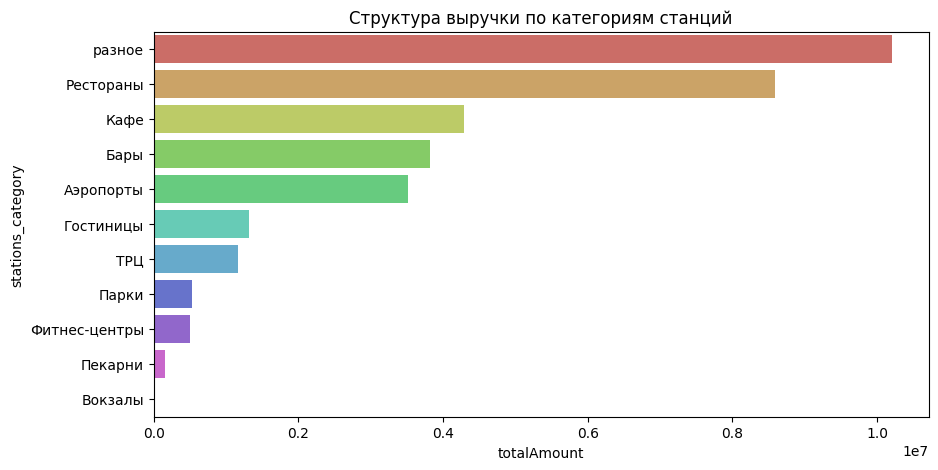

In [51]:
plt.figure(figsize=(10, 5))
ax=sns.barplot(x='totalAmount',y='stations_category',palette='hls',data= revenue_cat)

ax = plt.title('Структура выручки по категориям станций')

plt.xticks(rotation=0);


Теперь рассморим размер выручки на 1 станцию.

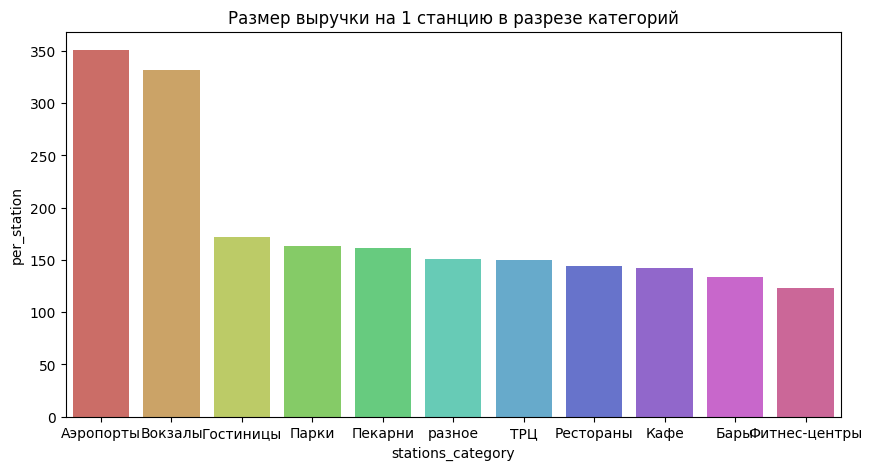

In [52]:
plt.figure(figsize=(10, 5))
ax=sns.barplot(x='stations_category',y='per_station',palette='hls',data= per_station)

ax = plt.title('Размер выручки на 1 станцию в разрезе категорий')

plt.xticks(rotation=0);

Из гистограммы видно,что размер выручки на 1 станцию больше всего  в категориях - аэропорты,вокзалы,гостиницы.

Рассмотрим размер выручки по Аэропортам в динамике.

In [53]:

airports = df_renst.query('stations_category=="Аэропорты"')
airports['created']=airports['created'].astype('datetime64[M]')
air_month = airports.groupby('created').agg({'totalAmount':'mean','stationID':'count'}).sort_values(by='totalAmount',ascending=False).reset_index()
air_month.head()

,created,totalAmount,stationID
0,2022-06-01,361.899459,9429
1,2022-03-01,257.031250,128
2,2022-02-01,200.000000,13
3,2022-09-01,155.372807,456


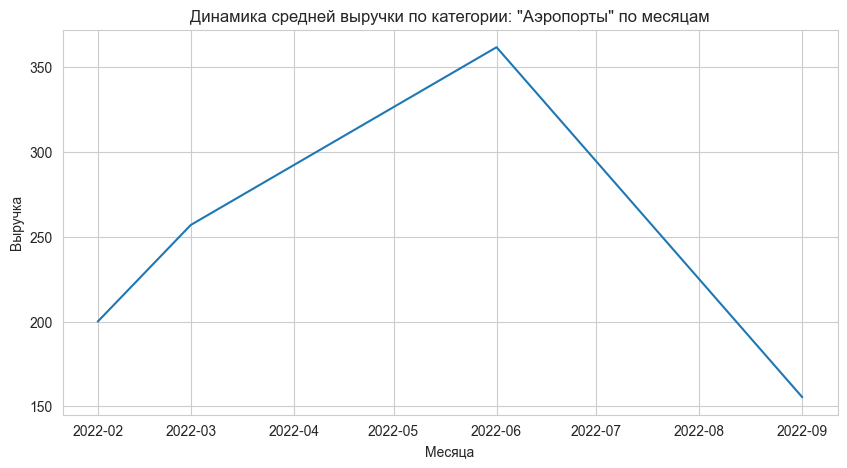

In [54]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
sns.lineplot(data=air_month, x="created", y="totalAmount")
plt.xlabel('Месяца')
plt.ylabel('Выручка')
plt.title('Динамика средней выручки по категории: "Аэропорты" по месяцам');

Из графика можно заметить рост выручки  с марта,пик  достигает в июне и спад в июле. Это можно объяснить ростом пассажиропотока в летний отпускной период.

In [55]:
hotel = df_renst.query('stations_category=="Гостиницы"')
hotel['created']=hotel['created'].astype('datetime64[M]')
hotel = hotel.groupby('created').agg({'totalAmount':'mean','stationID':'count'}).sort_values(by='totalAmount',ascending=False).reset_index()
hotel.head()

,created,totalAmount,stationID
0,2022-11-01,230.429212,1561
1,2021-12-01,180.482730,2403
2,2022-07-01,171.428571,63
3,2022-05-01,168.581081,296
4,2021-11-01,155.479452,146


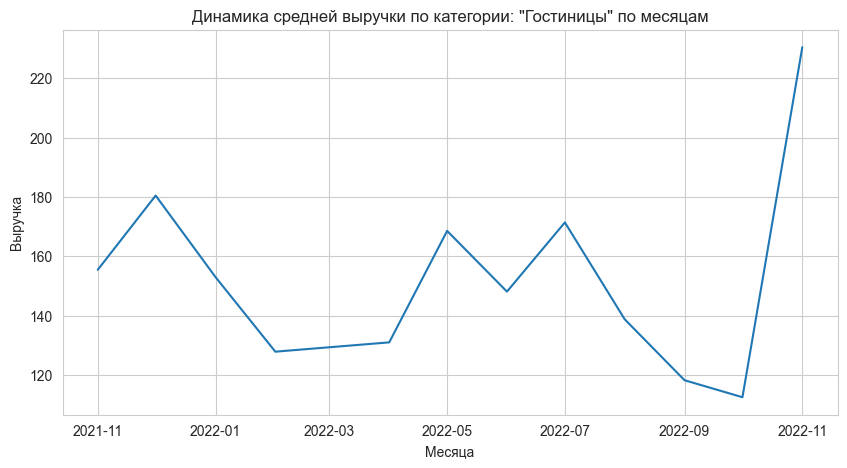

In [56]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
sns.lineplot(data=hotel, x="created", y="totalAmount")
plt.xlabel('Месяца')
plt.ylabel('Выручка')
plt.title('Динамика средней выручки по категории: "Гостиницы" по месяцам');

Из графика можно заметить резкий рост средней выручки  в октябре 2022. 

In [57]:
restor = df_renst.query('stations_category=="Рестораны"')
restor['created']=restor['created'].astype('datetime64[M]')
restor = restor.groupby('created').agg({'totalAmount':'mean','stationID':'count'}).sort_values(by='totalAmount',ascending=False).reset_index()
restor.head()

,created,totalAmount,stationID
0,2021-12-01,234.797980,1980
1,2021-11-01,234.716157,229
2,2022-11-01,229.533333,960
3,2022-05-01,177.863869,13487
4,2022-01-01,160.299125,4112


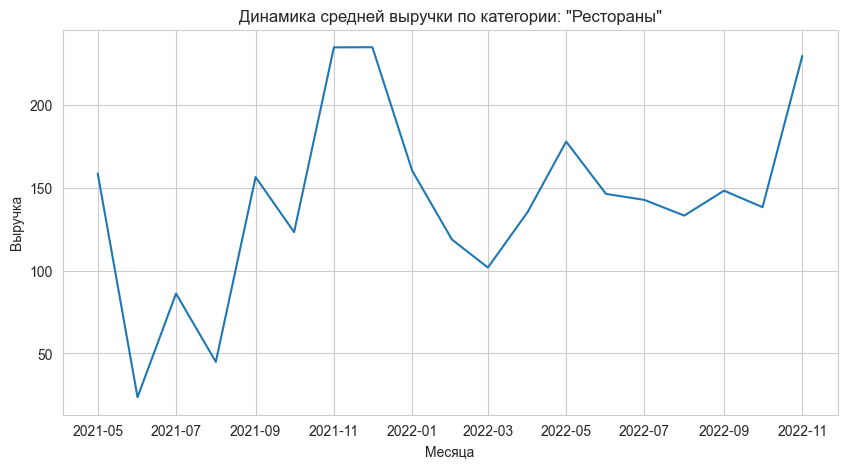

In [58]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
sns.lineplot(data=restor, x="created", y="totalAmount")
plt.xlabel('Месяца')
plt.ylabel('Выручка')
plt.title('Динамика средней выручки по категории: "Рестораны"');

Резкий рост средней выручки наблюдается в октябре 2021 года и сохраняется до января 2022 года.

In [59]:
power_banks_js.head()

,_id,powerBankId,created,slot,status,statusAt,batteryLevelPercent,batteryLevel,lastStation,_class,blocked,atUser,owner
0,{'$oid': '5f2ea70ebe0777000773cd5b'},6.143549e+18,{'$date': {'$numberLong': '1596892942512'}},5,RENTED,{'$date': {'$numberLong': '1603797930908'}},-1,PERCENT_UNKNOWN,"{'$ref': 'station', '$id': {'$oid': '5f8d4d34a...",com.zaryad.zaryad.backend.common.model.station...,NaN,None,None
1,{'$oid': '5f2ea70ebe0777000773cd5c'},5.930171e+18,{'$date': {'$numberLong': '1596892942535'}},4,IN_STATION,{'$date': {'$numberLong': '1670944805711'}},100,PERCENT_81_100,"{'$ref': 'station', '$id': {'$oid': '60718d418...",com.zaryad.zaryad.backend.common.model.station...,0.0,admin,60a670d760f61b6f012586d3
2,{'$oid': '5f2ea70ebe0777000773cd5d'},5.930171e+18,{'$date': {'$numberLong': '1596892942537'}},6,LOST,{'$date': {'$numberLong': '1643294209980'}},100,PERCENT_81_100,"{'$ref': 'station', '$id': {'$oid': '605ca5ced...",com.zaryad.zaryad.backend.common.model.station...,NaN,None,None
3,{'$oid': '5f2ea70ebe0777000773cd5e'},5.930171e+18,{'$date': {'$numberLong': '1596892942538'}},5,LOST,{'$date': {'$numberLong': '1643294209981'}},100,PERCENT_81_100,"{'$ref': 'station', '$id': {'$oid': '605ca5ced...",com.zaryad.zaryad.backend.common.model.station...,NaN,None,None
4,{'$oid': '5f2ea70ebe0777000773cd5f'},6.143549e+18,{'$date': {'$numberLong': '1596892942539'}},17,RENTED,{'$date': {'$numberLong': '1603988871190'}},-1,PERCENT_UNKNOWN,"{'$ref': 'station', '$id': {'$oid': '5f8d4d34a...",com.zaryad.zaryad.backend.common.model.station...,NaN,None,None


In [60]:
power_banks_js.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9174 entries, 0 to 9173
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   _id                  9174 non-null   object 
 1   powerBankId          9174 non-null   float64
 2   created              9174 non-null   object 
 3   slot                 9174 non-null   int64  
 4   status               9174 non-null   object 
 5   statusAt             9174 non-null   object 
 6   batteryLevelPercent  9174 non-null   int64  
 7   batteryLevel         9174 non-null   object 
 8   lastStation          9174 non-null   object 
 9   _class               9174 non-null   object 
 10  blocked              6596 non-null   float64
 11  atUser               2356 non-null   object 
 12  owner                6593 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 1003.4+ KB


Теперь посмотрим выручку по каждой станции.

In [61]:
st_aktiv=df_renst.groupby('stationID').agg({'totalAmount':'sum','powerBankID':'count'}).sort_values(by='totalAmount',ascending=False).reset_index()

In [62]:
len(st_aktiv)

946

In [63]:
st_aktiv.head()

,stationID,totalAmount,powerBankID
0,RL3H242001840013,705400.0,2223
1,FFRH082006020013,696950.0,3123
2,ADDH242108870007,679650.0,2287
3,FFRH082006430027,548050.0,2863
4,FFRH082008880015,490100.0,2061


In [64]:
df_renst.head()

,_id_x,completionStation,creditCardId,currentTariff.nameGroupTariffs,currentTariff.period,currentTariff.price,currentTariff.tariffName,currentTariff.timeForWork,currentTariff.typeTime,currentTariff.workingTimeInterval,...,additionalAddress,additionalImagesCount,address,blockedSlots,created,statusAt,numberSlots,month,year,stations_category
0,5ece363cab9b814d8716a6f0,"Нальчик, ул.Льва Толстого 18",5ece35c3ab9b814d8716a6ef,0,1,0.0,Промо,1,HOUR,0,...,1,1,1,1,1,1,1,1,1,разное
1,5ece45a5ab9b814d8716a703,"Нальчик, ул.Льва Толстого 18",5ece35c3ab9b814d8716a6ef,0,2,50.0,Час 50 рублей,2,HOUR,1,...,1,1,1,1,1,1,1,1,1,разное
2,5ecfd910ab9b815292b21712,"Нальчик, ул.Льва Толстого 18",5ece35c3ab9b814d8716a6ef,0,1,0.0,Промо,1,HOUR,0,...,1,1,1,1,1,1,1,1,1,разное
3,5ed7b00bab9b811856f6cab3,"Нальчик, ул.Льва Толстого 18",5ece35c3ab9b814d8716a6ef,0,1,0.0,Промо,1,HOUR,0,...,1,1,1,1,1,1,1,1,1,разное
4,5ee7ab76ab9b81710d8ab8db,"Нальчик, ул.Льва Толстого 18",5ee7ab6cab9b81710d8ab8da,0,1,0.0,Промо,1,HOUR,0,...,1,1,1,1,1,1,1,1,1,разное


Посмотрим какие станции окупаются.

In [65]:
st_reven= df_renst.groupby('stationID').agg({'totalAmount':'sum','numberSlots':'unique'}).sort_values(by='totalAmount',ascending=False).reset_index()

In [66]:
st_reven.head()

,stationID,totalAmount,numberSlots
0,RL3H242001840013,705400.0,[24.0]
1,FFRH082006020013,696950.0,[8.0]
2,ADDH242108870007,679650.0,[24.0]
3,FFRH082006430027,548050.0,[8.0]
4,FFRH082008880015,490100.0,[8.0]



Теперь внесем стоимость станций и добавим новый столбец с price_station.

In [67]:
def price_station(row):#  создадим проставления стоимости станции
    numberSlots = row['numberSlots']
    if numberSlots ==[48.0]:
        return 360000.0
    if numberSlots ==[24.0]:
        return 180000.0
    if  numberSlots ==[8.0]:
        return 36000.0
    if numberSlots ==[4.0]:
        return 18000.0
    
    else:
        return 0
    
    
st_reven['price_station'] = st_reven.apply(price_station,axis=1)
st_reven.head(10)

,stationID,totalAmount,numberSlots,price_station
0,RL3H242001840013,705400.0,[24.0],180000.0
1,FFRH082006020013,696950.0,[8.0],36000.0
2,ADDH242108870007,679650.0,[24.0],180000.0
3,FFRH082006430027,548050.0,[8.0],36000.0
4,FFRH082008880015,490100.0,[8.0],36000.0
5,FFRH082006000046,398900.0,[8.0],36000.0
6,FFRH082006820039,397000.0,[8.0],36000.0
7,ADDH242108650005,390800.0,[24.0],180000.0
8,RL3H242001410012,387700.0,[24.0],180000.0
9,FFRH082006250049,384050.0,[8.0],36000.0


In [68]:
st_reven.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 946 entries, 0 to 945
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   stationID      946 non-null    object 
 1   totalAmount    946 non-null    float64
 2   numberSlots    946 non-null    object 
 3   price_station  946 non-null    float64
dtypes: float64(2), object(2)
memory usage: 29.7+ KB


Добавим столбец окупаемость payback в таблицу st_reven.

In [69]:
st_reven['totalAmount'].astype('int')

0      705400
1      696950
2      679650
3      548050
4      490100
        ...  
941         0
942         0
943         0
944         0
945         0
Name: totalAmount, Length: 946, dtype: int32

In [70]:
st_reven['net_revenue'] = st_reven['totalAmount']*75/100
st_reven.head()

,stationID,totalAmount,numberSlots,price_station,net_revenue
0,RL3H242001840013,705400.0,[24.0],180000.0,529050.0
1,FFRH082006020013,696950.0,[8.0],36000.0,522712.5
2,ADDH242108870007,679650.0,[24.0],180000.0,509737.5
3,FFRH082006430027,548050.0,[8.0],36000.0,411037.5
4,FFRH082008880015,490100.0,[8.0],36000.0,367575.0


In [71]:
st_reven.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 946 entries, 0 to 945
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   stationID      946 non-null    object 
 1   totalAmount    946 non-null    float64
 2   numberSlots    946 non-null    object 
 3   price_station  946 non-null    float64
 4   net_revenue    946 non-null    float64
dtypes: float64(3), object(2)
memory usage: 37.1+ KB


In [72]:
st_reven['payback']=st_reven['net_revenue']-st_reven['price_station']
st_reven.head()

,stationID,totalAmount,numberSlots,price_station,net_revenue,payback
0,RL3H242001840013,705400.0,[24.0],180000.0,529050.0,349050.0
1,FFRH082006020013,696950.0,[8.0],36000.0,522712.5,486712.5
2,ADDH242108870007,679650.0,[24.0],180000.0,509737.5,329737.5
3,FFRH082006430027,548050.0,[8.0],36000.0,411037.5,375037.5
4,FFRH082008880015,490100.0,[8.0],36000.0,367575.0,331575.0


In [73]:
st_ordinary= st_reven.query('payback<0')
len(st_ordinary)

618

In [74]:
ak=st_reven.query('payback>0')
ak.head()

,stationID,totalAmount,numberSlots,price_station,net_revenue,payback
0,RL3H242001840013,705400.0,[24.0],180000.0,529050.0,349050.0
1,FFRH082006020013,696950.0,[8.0],36000.0,522712.5,486712.5
2,ADDH242108870007,679650.0,[24.0],180000.0,509737.5,329737.5
3,FFRH082006430027,548050.0,[8.0],36000.0,411037.5,375037.5
4,FFRH082008880015,490100.0,[8.0],36000.0,367575.0,331575.0


In [75]:
print('Доля окупаемых станций составляет', (len(st_reven)-len(st_ordinary))/len(st_reven)*100)

Доля окупаемых станций составляет 34.6723044397463


Рассмотрим проблемные события, из-за которых пауэр банк блокируют.

In [76]:
problem_events=power_bank_problem_events.groupby('problemComment').agg({'slot':['unique','count'],'checkPeriod':['unique','count']}).reset_index()
problem_events.head()

problemComment    slot        \
                                                      unique count   
0                                       Не работает      [2]     1   
1   Нужна проверка и слота и пауэрбанка. Не выдае...     [1]     1   
2                                      "не заряжает"     [2]     1   
3  10 дневный срок проверки прошел - продлили еще...  [4, 8]     2   
4                        20 секунд работает и тухнет     [1]     1   

  checkPeriod        
       unique count  
0       [0.0]     1  
1       [7.0]     1  
2       [7.0]     1  
3       [0.0]     2  
4      [10.0]     1

In [77]:
dict_cat_problem= {
    'Провод не исправен': ['шнур','порван','не заряжает','кабель','не держит','оторван','деформирован шнур'],
    'Проверка':['сломан','проверка','со слов ','блокировка','зарядка','час','20 минут'],
     'Слот не исправен':['брак','слот','Не вышел при аренде','со слотом']}
def categories(problems):
    for category, items in dict_cat_problem.items():
        for item in items:
            if item in problems:
                return category
    return 'другая причина'

problem_events['ploblems_category']=problem_events['problemComment'].apply(categories)

In [78]:
problem_events['ploblems_category'].value_counts()

Провод не исправен    115
другая причина         93
Проверка               34
Слот не исправен       10
Name: ploblems_category, dtype: int64

Основная причина блокировки пауэр-банков - провод не исправен.

In [79]:
power_bank_problem_events['slot'].unique()

array([ 4,  8,  5,  1,  7,  3,  2,  6, 11, 20, 24, 10, 15, 14, 12,  0,  9,
       19, 22, 16], dtype=int64)

In [80]:
power_bank_problem_events['checkPeriod'].unique()

array([10.,  1., nan,  0.,  2.,  3.,  7.])

### Выводы:

- Основную массу выручки приносят категории - разное, рестораны , кафе и бары.

- размер выручки на 1 станцию больше всего  в категориях - аэропорты,вокзалы,гостиницы.

- рост выручки по категории Аэропорты заметен с марта,пик  достигает в июне и спад в июле. 
   Это можно объяснить ростом пассажиропотока в летний отпускной период.

-  наблюдается рост средней выручки по категории гостиницы в октябре 2022.
-  резкий рост средней выручки наблюдается в октябре 2021 года и сохраняется до января 2022 года.

- Доля окупаемых станций составляет 34.7%

- Основная причина блокировки пауэр-банков - провод не исправен.

### Рекомендации:

- устранение или минимизация количества причины блокировки пауэр-банков
- техническая поддержка арендаторов
- размещение станций в гостиницах ,аэропортах,вокзалах,парках.